# Home Assignment 2

name: Sean Deloddere<br>
studentnr: 914691

## Preparation

### Load packages

In [1]:
# Load the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = (10,10) # Set the size of the display images

## Exercise 1

### Preparation

#### Load data

In [2]:
data = pd.read_csv('spiral.txt', sep="\t", header=None)
data.columns = ["x","y","label"]
data

,x,y,label
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


#### Visualize data

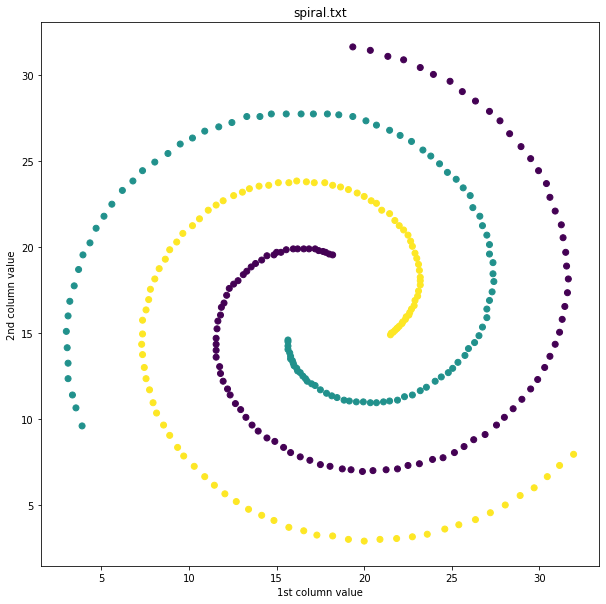

In [3]:
plt.scatter(x=data["x"],y=data["y"],c=data["label"])
plt.xlabel('1st column value')
plt.ylabel('2nd column value')
plt.title('spiral.txt')
plt.show()

#### Seperate first 2 columns for clustering

In [4]:
data_num = data[["x","y"]]
data_num

,x,y
0,31.95,7.95
1,31.15,7.30
2,30.45,6.65
3,29.70,6.00
4,28.90,5.55
...,...,...
307,15.75,13.85
308,15.65,14.05
309,15.65,14.25
310,15.65,14.50


### Clustering

#### a) K-means

From the data given we already know that we are supposed to find 3 clusters, so I will set the number of clusters to 3.

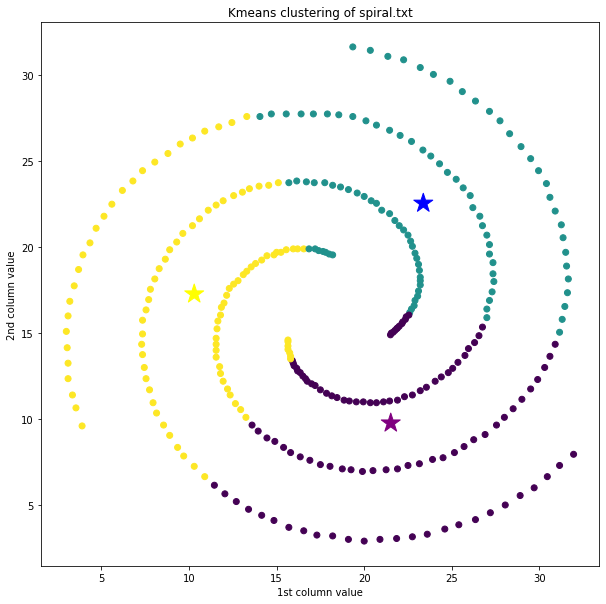

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_num)

plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],c=['purple','blue','yellow'],s=400,marker="*")
plt.scatter(x=data["x"],y=data["y"],c=kmeans.labels_)
plt.xlabel('1st column value')
plt.ylabel('2nd column value')
plt.title('Kmeans clustering of spiral.txt')
plt.show()

As expected from Kmeans, the datapoints are not clustered together according to their original labels. Kmeans will group points together based on their distance to the nearest means of an existing cluster, which means that the algorithm has no way of picking up on the spiral pattern that we see here, and the clustering will result in the three way split we clearly see here on the plot.

### b) Spectral clustering

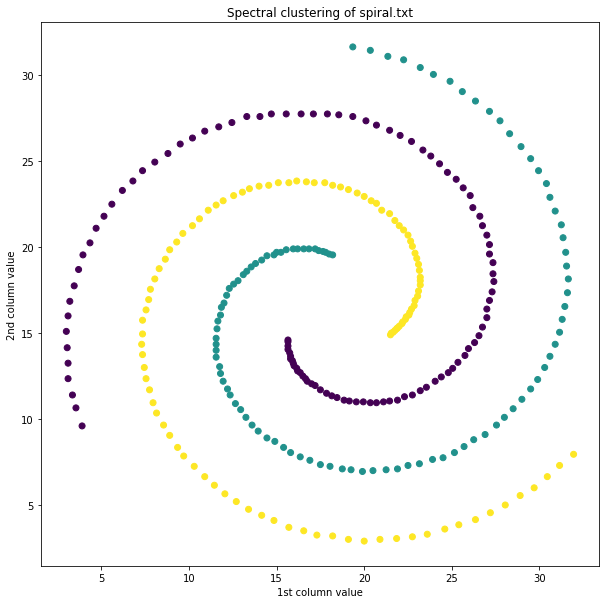

In [6]:
from sklearn.cluster import SpectralClustering

spec_clustering = SpectralClustering(n_clusters=3,random_state=0).fit(data_num)

plt.scatter(x=data["x"],y=data["y"],c=spec_clustering.labels_)
plt.xlabel('1st column value')
plt.ylabel('2nd column value')
plt.title('Spectral clustering of spiral.txt')
plt.show()

Here we clearly see that spectral clustering did a much better job at picking up on the spiral pattern. This makes sense because the (normalized, in the case of this library) Laplacian used in spectral clustering has the property that minimizing y.t L y is equivalent to minimizing sum(i..n) sum(j..n) w_ij (y_i-y_j)^2 . So spectral clustering inherently will look to put the most weight on the differences between points that are the closest to each other. So spectral clustering has an easier time picking up on stringlike patterns, since the points that are right next to each other should be in the same cluster.

### Compute the quality of the resulting clusters using the following indices

#### a) Silhouette

In [7]:
from sklearn.metrics import silhouette_score

Sil_kmeans = silhouette_score(data_num, kmeans.labels_, metric='euclidean')
Sil_spectr = silhouette_score(data_num, spec_clustering.labels_, metric='euclidean')

print("Silhouette score for kmeans: "+str(Sil_kmeans))
print("Silhouette score for spectral clustering: "+str(Sil_spectr))

Silhouette score for kmeans: 0.36016366346232903
Silhouette score for spectral clustering: 0.0013442973442779936


#### b) Davies-Bouldin

In [8]:
from sklearn.metrics import davies_bouldin_score

db_kmeans = davies_bouldin_score(data_num, kmeans.labels_)
db_spectr = davies_bouldin_score(data_num, spec_clustering.labels_)

print("Davies-Bouldin score for kmeans: "+str(db_kmeans))
print("Davies-Bouldin score for spectral clustering: "+str(db_spectr))

Davies-Bouldin score for kmeans: 0.8859880133973296
Davies-Bouldin score for spectral clustering: 5.882022552277642


#### c) Normalized Mutual Information

In [9]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi_kmeans = normalized_mutual_info_score(data["label"], kmeans.labels_)
nmi_spectr = normalized_mutual_info_score(data["label"], spec_clustering.labels_)

print("Normalized Mutual Information for kmeans: "+str(nmi_kmeans))
print("Normalized Mutual Information for spectral clustering: "+str(nmi_spectr))

Normalized Mutual Information for kmeans: 0.0005404343708784823
Normalized Mutual Information for spectral clustering: 1.0


### ranking

Silhouette & Davies-Bouldin
1. kmeans
2. spectral

NMI
1. spectral
2. kmeans

The Silhouette and Davies-Bouldin metrics seem to indicate that the kmeans algorithm performed better, which makes sense (in the context of these metrics), since the points are clustered together with other points that they are 'spacially' closest too. However, when we look at the NMI, and at plots, to compare the resulting clustering to the actual labels, we notice that spectral clustering actually far outperformed kmeans. This is because spectral clustering takes into account the relations between points, and thus looks at the closest neighbours of each node, and manages to pick up the spiral patern that kmeans can not pick up. All in all we can conclude that spectral clustering performs better on this data, and that we should be careful when using certain metrics to check the performance of certain algorithms on certain data sets.

One thing to keep in mind with NMI is that we need the actual label to compare how good it worked though, while the other metrics can be used without any information on how the result is supposed to look.

## Exercise 2

In [10]:
data_num_np = data_num.to_numpy()

#### Kernel function:

In [11]:
def Kernel(x_i,x_j):
    var = 1
    return np.exp(-(((x_i[0]-x_j[0])**2+(x_i[1]-x_j[1])**2))/(2*var))

Testin Kernel function and deciding on variance:

In [12]:
print(Kernel(data_num_np[0],data_num_np[1]))

0.5878696731223461


In [13]:
print(data_num.var())

x    53.288880
y    47.158871
dtype: float64


I figured out that keeping var low means that only the closest points get taken into account, since the slope of the normal distribution is quite steep, while when choosing a high var points further away will also contribute quite a lot to the score, because the slope is less steep. Since we know that our desired clusters are string-like, it is best to keep the var low so that only the closest points are taken into account.

#### Cluster function:

In [14]:
def Clust(label_i,label_j):
    if(label_i == label_j):
        return 1
    else:
        return 0

#### Tau function:

In [15]:
def Tau(data, labels):
    tau = 0
    for i in range(len(data)):
        num = 0
        denom = 0
        for j in range(len(data)):
            if(i != j):
                num += Clust(labels[i],labels[j])*Kernel(data[i],data[j])
                denom += Kernel(data[i],data[j])
        tau += num/denom
    tau = (1/len(data))*tau
    return tau

### a) Compute Tau for the previously obtained clustering

In [16]:
tau_kmeans = Tau(data_num_np,kmeans.labels_)
tau_spectr = Tau(data_num_np,spec_clustering.labels_)

print("Tau score for kmeans :"+str(tau_kmeans))
print("Tau score for spectral clustering: "+str(tau_spectr))

Tau score for kmeans :0.9255325354956404
Tau score for spectral clustering: 0.9994790295553356


#### Compare Tau to Sil and DB

Seems Tau is better (with the lower variance), it picks up on spectral clustering being the better clusterer, without needing the actual labels (like NMI) to determine it.

### b) Disadvantage in using Tau

You need to figure out a proper value for sigma. If sigma is too small, the kernel value will tend towards 0 very quickly and the metric will basically only check if the neirest neighbour has the same cluster label and if so return a perfect 1. If the sigma is too large it will charge a penatly for data points having a different cluster label that are actually far enough away for it to be reasonable for them to be part of a different cluster. This also makes it arbitrary, since different choices of sigma can result in different outcomes, and no sigma is objectively the best choice. So, you need some extra information about your data, or a certain patter or clusters you expect to find, to choose a reasonable sigma.

This can also be seen as an advantage though, Silhouette and Davies-Bouldin seem to always perform bad on a data set like this, while Tau has the option of being tuned to more easily detect certain cluster patterns.

### c) Alternative validation index

#### Using nearest neighbour

My motivation to use nearest neighbour is that for this particular data it makes sense to use nearest neighbour since we have stringlike clusters (clusters that form a line). Nearest neighbour will make it so that it is particularly important that the nearest neighbours, or closest points, are in the same cluster. If the amount of nearest neighbours (k) is relatively low, it should correctly pick up on the line pattern. 

To use nearest neighbour instead of the gaussian kernel, I make a slight adaptation to the Tau function. 

At the start I will calculate a nearest neighbour matrix, in which each row represents a data point, and has a 1 in each column if the point corresponding to that column is a closest point (thus "nearest neighbour") of the point corresponding to the row.

Then I will use this matrix in place of the kernel function.

#### Tau_NN:

In [17]:
from sklearn.neighbors import NearestNeighbors

def Tau_NN(data, labels,kN):
    nbrs = NearestNeighbors(n_neighbors=kN, algorithm='ball_tree').fit(data_num)
    NN = nbrs.kneighbors_graph(data_num).toarray()
    tau_NN = 0
    for i in range(len(data)):
        num = 0
        denom = 0
        for j in range(len(data)):
            if(i != j):
                num += Clust(labels[i],labels[j])*NN[i][j]
                denom += NN[i][j]
        tau_NN += num/denom
    tau_NN = (1/len(data))*tau_NN
    return tau_NN

In [18]:
tau_NN_kmeans = Tau_NN(data_num_np,kmeans.labels_,4)
tau_NN_spectr = Tau_NN(data_num_np,spec_clustering.labels_,4)

print(tau_NN_kmeans)
print(tau_NN_spectr)

0.9615384615384615
1.0


This indice again indicates that spectral clustering outperformed kmeans clustering. We get a 1.0 for spectral clustering, which makes sense for 4 neighbours. The only way the numerater and denominator can differ is when the cluster labels are different for any of the nearest neighbours. In this example, this is not the case for any point. If we were to increase the amount of neighbours we could see something else:

In [19]:
tau_NN_kmeans = Tau_NN(data_num_np,kmeans.labels_,20)
tau_NN_spectr = Tau_NN(data_num_np,spec_clustering.labels_,20)

print(tau_NN_kmeans)
print(tau_NN_spectr)

0.8589743589743591
0.7479757085020226


We notice that for 20 nearest neighbours, kmeans actually outperforms spectral clustering. This is because if the algorithm starts looking at that many neighbours, some of the neighbours will come from a different spiralline, so it will lose track of the spiral pattern. We can check where the tipping point lies:

In [20]:
tau_NN_kmeans = 0
tau_NN_spectr = 1
i=2
while tau_NN_kmeans < tau_NN_spectr:
    print(i)
    tau_NN_kmeans = Tau_NN(data_num_np,kmeans.labels_,i)
    tau_NN_spectr = Tau_NN(data_num_np,spec_clustering.labels_,i)
    print(tau_NN_kmeans)
    print(tau_NN_spectr)
    print("---------------")
    i += 1


2
0.9647435897435898
1.0
---------------
3
0.9711538461538461
1.0
---------------
4
0.9615384615384615
1.0
---------------
5
0.9559294871794871
0.999198717948718
---------------
6
0.9480769230769233
0.998076923076923
---------------
7
0.94017094017094
0.9951923076923077
---------------
8
0.9313186813186812
0.9917582417582418
---------------
9
0.921073717948718
0.9879807692307692
---------------
10
0.9116809116809111
0.9707977207977205
---------------
11
0.9028846153846157
0.9532051282051288
---------------
12
0.8974358974358969
0.9286130536130529
---------------
13
0.8915598290598292
0.9043803418803418
---------------
14
0.8836291913214984
0.879930966469428
---------------


It seems that starting from 14 nearest neighbours kmeans seemingly outperforms spectral clustering. Kmeans of course also has some randomness involved so results may differ. We could say that if the clusters have a more stringlike shape, we probably want to keep the amount of neighbours low, and if they have a more ball or cloud shape we would want a larger number of neighbours.

This means that this method has a similar drawback as the guassian kernel, in that we have a parameter that is not objectively defined, and that we have to set by hand ourselves.

## Exercise 3

$δ = P(a,b) - P(a) P(b)$ <br>
$γ = P(a,b)/(P(a) P(b))$ <br>

fr(x) = amount of rows containing x <br>

Positive association: $P(X,C) > P(X)P(C), (δ > 0, γ > 1)$ 

### a) Calculate leverage or lift for all rules, prune out rules that do not express positive statistical dependence

In total there are 1000 patients, so $P(x) = fr(x)/1000$ <br>
30% of patients have heart disease, so $P(hd) = 0.3$ and $P(\neg hd) = 0.7$ .<br>
(hd=heart disease)

In [21]:
def leverage(frX,frXC,pC):
    return (frXC/1000 - (frX/1000 * pC))

def lift(frX,frXC,pC):
    return((frXC/1000)/(frX/1000* pC))

Put values of table 1 here for easy acces:

In [22]:
fr = [[300,125,0.3],[500,150,0.3],[500,400,0.7],[342,240,0.7],[2,2,0.7],[500,352,0.7],[260,100,0.3],[120,32,0.3],[240,100,0.3],[80,32,0.3],[200,100,0.3],[251,203,0.7]]

In [23]:
for i in range(12):
    print("rule "+str(i+1)+":")
    print("leverage: "+str(leverage(fr[i][0],fr[i][1],fr[i][2])))
    print("lift: "+str(lift(fr[i][0],fr[i][1],fr[i][2])))
    if(leverage(fr[i][0],fr[i][1],fr[i][2]) <= 0):
        print("No positive statistical dependence!")
    print("---------")

rule 1:
leverage: 0.035
lift: 1.3888888888888888
---------
rule 2:
leverage: 0.0
lift: 1.0
No positive statistical dependence!
---------
rule 3:
leverage: 0.050000000000000044
lift: 1.142857142857143
---------
rule 4:
leverage: 0.0005999999999999894
lift: 1.0025062656641603
---------
rule 5:
leverage: 0.0006000000000000001
lift: 1.4285714285714286
---------
rule 6:
leverage: 0.0020000000000000018
lift: 1.0057142857142858
---------
rule 7:
leverage: 0.022000000000000006
lift: 1.2820512820512822
---------
rule 8:
leverage: -0.003999999999999997
lift: 0.888888888888889
No positive statistical dependence!
---------
rule 9:
leverage: 0.02800000000000001
lift: 1.388888888888889
---------
rule 10:
leverage: 0.008
lift: 1.3333333333333333
---------
rule 11:
leverage: 0.04000000000000001
lift: 1.6666666666666667
---------
rule 12:
leverage: 0.02730000000000002
lift: 1.155378486055777
---------


Rule 2 shows statistical independence, rule 8 shows negatice statistical dependence.
__Prune rule 2 and 8.__

### b) Evaluate MI of remaining rules and prune out rules where n*MI < 1.5

In [24]:
def M_I(frC,frCD,pD):
    pC = frC/1000
    pCD = frCD/1000
    Ci = [pC,1-pC]
    Dj = [pD,1-pD]
    CDij = [[pCD, pD-pCD],[pC-pCD, 1-pC-pD+pCD]]
   
    return np.log2(((CDij[0][0]**CDij[0][0])*(CDij[1][0]**CDij[1][0])*(CDij[0][1]**CDij[0][1])*(CDij[1][1]**CDij[1][1]))/((Ci[0]**Ci[0])*(Ci[1]**Ci[1])*(Dj[0]**Dj[0])*(Dj[1]**Dj[1])))

In [25]:
for i in range(12):
    if((i+1) != 2 and (i+1) != 8):
        print("rule "+str(i+1)+":")
        print("MI: "+str(M_I(fr[i][0],fr[i][1],fr[i][2])))
        if(M_I(fr[i][0],fr[i][1],fr[i][2]) < 0.0015):
            print("Mutual Information too low!")
        print("---------")

rule 1:
MI: 0.01943558511395403
---------
rule 3:
MI: 0.03485155455967688
---------
rule 4:
MI: 5.498059238843441e-06
Mutual Information too low!
---------
rule 5:
MI: 0.001030384947208025
Mutual Information too low!
---------
rule 6:
MI: 5.4961040800631995e-05
Mutual Information too low!
---------
rule 7:
MI: 0.008398761583067321
---------
rule 9:
MI: 0.014201862747021876
---------
rule 10:
MI: 0.002846664406839561
---------
rule 11:
MI: 0.03226839966338602
---------
rule 12:
MI: 0.01446150435508552
---------


##### We end up pruning 4,5 and 6 in this step and are left with 1,3,7,9,10,11 and 12

(this next cell is not intended for grading, however, I originally used this function to calculate the MI, based on the slides, but it wasn't working. I can't figure out why that is. Could I get feedback on this if possible?)

In [26]:
#THE WORKING SOLUTION IS ABOVE, THIS IS JUST OUT OF CURIOSITY!!!!
def Mutual_Information(frC,frCD, pD):
    pC = frC/1000
    pCD = frCD/1000
    Ci = [pC,1-pC]
    Dj = [pD,1-pD]
    CDij = [[pCD, pD-pCD],[pC-pCD, 1-pC-pD+pCD]]
    print(Ci)
    print(Dj)
    
    MI = 0
    for i in range (2):
        for j in range(2):
            MI += CDij[i][j]*np.log(CDij[i][j]/(Ci[i]*Dj[j]))
    
    
    return MI

### c) Evaluate overfitting

In [27]:
def Conditional_Mutual_Information(pX,pXQC,pXQnC,pXnQC,pXnQnC,pXQ,pXnQ,pXC,pXnC):
    num = pX**pX * pXQC**pXQC * pXQnC**pXQnC * pXnQC**pXnQC * pXnQnC**pXnQnC
    denom = pXQ**pXQ * pXnQ**pXnQ * pXC**pXC * pXnC**pXnC
    return np.log2(num/denom)

Rule 1 doesn't have a super group, except for just patients -> heart disease, so it passes. <br>
Rule 3 doesn't have a super group, except for just patients -> heart disease, so it passes. <br>

Rule 7:<br>
$P(hd | female,stress) = P(hd,female,stress)/P(female,stress) = 0.10/0.260 = 0.385$<br>
Rule 7 has 2 super groups, females and stress.<br>
Stress implying heart disease was rule 2, so we can directly compare: <br>
$P(hd | stress) = P(hd,stress)/P(stress) = 0.150/0.5 = 0.3$<br>
Female implying heart disease can be derived from rule 6:<br>
$P(female,hd) = P(female) - P(female,\neg hd) = 0.148$<br>
$P(hd | female) = P(hd,female)/P(female) = 0.148/0.5 = 0.296$<br>
$0.3 < 0.385$ & $0.296 < 0.385$, so there is no overfitting. It is interesting to note that, while stress and being female on its own shows almost no relation to heart disease, both around 0.3 which is the average, these factors combined increase the risk of heart disease by a considerable margin.<br>

MIc1:<br>
X = female,<br>
Q = stress,<br>
C = hd<br>

In [28]:
pX = 0.5 #directly from assignment
pXQC = 0.1 #directly from table
pXQnC = 0.16 #= 0.26 - 0.1 = female and stress - female, stress and hd
pXnQC = 0.048 #= 0.148 - 0.1  = female and hd - female, stress and hd
pXnQnC = 0.192 #= 0.352 - 0.16  = female and no hd - female, stress and no hd
pXQ = 0.26 #directly from table
pXnQ = 0.24 #= 0.5 - 0.26  = female - female and stress
pXC = 0.148 #see above
pXnC = 0.352 #directly from table

CMI_7_1 = Conditional_Mutual_Information(pX,pXQC,pXQnC,pXnQC,pXnQnC,pXQ,pXnQ,pXC,pXnC)
print("MIhd give female is: "+str(CMI_7_1))
if(CMI_7_1 < 0.0005):
    print("Too low, prune the rule!")

MIhd give female is: 0.0149888544567157


MIc2:<br>
X = stress,<br>
Q = female,<br>
C = hd<br>

In [29]:
pX = 0.5 #directly from table
pXQC = 0.1 #directly from table
pXQnC = 0.16 #= 0.26 - 0.1 = female and stress - female, stress and hd
pXnQC = 0.05 #= 0.150 -  0.1 = stress and hd - female, stress and hd
pXnQnC = 0.190 #= 0.350 - 0.16  = stress and no hd - female, stress and no hd
pXQ = 0.26 #directly from table
pXnQ = 0.24 #= 0.5 - 0.26  = stress - female and stress
pXC =  0.15 #directly from table
pXnC =  0.350 #see above

CMI_7_2 = Conditional_Mutual_Information(pX,pXQC,pXQnC,pXnQC,pXnQnC,pXQ,pXnQ,pXC,pXnC)
print("MIhd give stress is: "+str(CMI_7_2))
if(CMI_7_2 < 0.0005):
    print("Too low, prune the rule!")

MIhd give stress is: 0.0135355645129705


Rule 9:<br>
$P(hd | smoking,coffee) = P(hd,smoking,coffee)/P(smoking,coffee) = 0.100/0.240 = 0.417$<br>
Rule 9 has 2 super groups, smoking and coffee.<br>
Smoking implying heart disease was rule 1, so we can directly compare: <br>
$P(hd | smoking) = P(hd,smoking)/P(smoking) = 0.125/0.300 = 0.417$<br>
Coffee implying heart disease can be derived from rule 4:<br>
$P(coffee,hd) = P(coffee) - P(coffee,no hd) = 0.102$<br>
$P(hd | coffee) = P(hd,coffee)/P(coffee) = 0.102/0.342 = 0.298$<br>
$0.298 < 0.417$ so coffee is fine, however, $0.417 = 0.417$, indicating that the probability of getting heart disease when smoking compared to the probability of getting heart disease when smoking and drinking coffee is the same, implying that the coffee part is irrelevant. __So we prune rule 9.__<br>

Rule 10:<br>
$P(hd | smoking,sports) = P(hd,smoking,sports)/P(smoking,sports) = 0.032/0.080 = 0.400$<br>
Rule 10 has 2 super groups, smoking and sports.<br>
Smoking we know from Rule 9, it $= 0.417$<br>
Sports implying heart disease can be derived from rule 3:<br>
$P(sports,hd) = P(sports) - P(sports,no hd) = 0.100$<br>
$P(hd | sports) = P(hd,sports)/P(sports) = 0.100/0.500 = 0.200$<br>
0.200 < 0.400 so Sports is fine, however, 0.417 > 0.400, indicating that smoking alone actually contributes more to heart disease than smoking and sports. __So we prune the rule 10.__<br>

Rule 11:<br>
$P(hd | smoking,stress) = P(hd,smoking,stress)/P(smoking,stress) = 0.100/0.200 = 0.500$<br>
Rule 11 has 2 super groups, smoking and stress.<br>
Smoking we know from Rule 9, it $= 0.417$<br>
Stress we know from Rule 7, it $= 0.3$<br>
$0.417 < 0.500$ & $0.3 <0.500$, so there is no overfitting. Seems like smoking and stress is a bad combination for heart disease!

(For the remaining MI calculations I wont write down my reasoning anymore since it takes too much time and is analogous to Rule 7.)

MIc1:<br>
X = smoking,<br>
Q = stress,<br>
C = hd<br>

In [30]:
pX = 0.3
pXQC = 0.1
pXQnC = 0.1 
pXnQC = 0.025
pXnQnC = 0.075
pXQ = 0.2
pXnQ = 0.1
pXC = 0.125
pXnC = 0.175

CMI_11_1 = Conditional_Mutual_Information(pX,pXQC,pXQnC,pXnQC,pXnQnC,pXQ,pXnQ,pXC,pXnC)
print("MIhd given smoking is: "+str(CMI_11_1))
if(CMI_11_1 < 0.0005):
    print("Too low, prune the rule!")

MIhd given smoking is: 0.012832814549432256


MIc2:<br>
X = stress,<br>
Q = smoking,<br>
C = hd<br>

In [31]:
pX = 0.5
pXQC = 0.1
pXQnC = 0.1
pXnQC = 0.05
pXnQnC = 0.25
pXQ = 0.2
pXnQ = 0.3
pXC = 0.15
pXnC = 0.35

CMI_11_2 = Conditional_Mutual_Information(pX,pXQC,pXQnC,pXnQC,pXnQnC,pXQ,pXnQ,pXC,pXnC)
print("MIhd given stress is: "+str(CMI_11_2))
if(CMI_11_2 < 0.0005):
    print("Too low, prune the rule!")

MIhd given stress is: 0.04563872312084026


Rule 12:<br>
$P(no hd | female,sports) = P(no hd,female,sports)/P(female,sports) = 0.203/0.251 = 0.809$<br>
Rule 11 has 2 super groups, female and sports.<br>
Sports implying no heart disease is rule 3 so we can calculate directly:<br>
$P(no hd | sports) = P(no hd, sports)/P(sports) = 0.4/0.5 = 0.8$<br>
Female implying no heart disease is rule 6 so we can calculate directly:<br>
$P(no hd | female) = P(no hd, female)/P(female) = 0.352/0.5 = 0.704$<br>
$0.8 < 0.809$ & $0.704 < 0.809$, so there is no overfitting.

MIc1:<br>
X = female,<br>
Q = sports,<br>
C = no hd<br>

In [32]:
pX = 0.5
pXQC = 0.203
pXQnC = 0.048
pXnQC = 0.149
pXnQnC = 0.1
pXQ = 0.251
pXnQ = 0.249
pXC = 0.352
pXnC = 0.148

CMI_12_1 = Conditional_Mutual_Information(pX,pXQC,pXQnC,pXnQC,pXnQnC,pXQ,pXnQ,pXC,pXnC)
print("MIhd given female is: "+str(CMI_12_1))
if(CMI_12_1 < 0.0005):
    print("Too low, prune the rule!")

MIhd given female is: 0.019458321080575637


MIc2:<br>
X = sports,<br>
Q = female,<br>
C = no hd<br>

In [33]:
pX = 0.5
pXQC = 0.203
pXQnC = 0.048
pXnQC = 0.197
pXnQnC = 0.052
pXQ = 0.251
pXnQ = 0.249
pXC = 0.4
pXnC = 0.1

CMI_12_1 = Conditional_Mutual_Information(pX,pXQC,pXQnC,pXnQC,pXnQnC,pXQ,pXnQ,pXC,pXnC)
print("MIhd given female is: "+str(CMI_12_1))
if(CMI_12_1 < 0.0005):
    print("Too low, prune the rule!")

MIhd given female is: 0.00017459931653478918
Too low, prune the rule!


##### We end up pruning 9, 10 and 12 in this step, and are left with 1,3, 7 and 11

### d) Judge the rule:

rule: $tea -> \neg hd$<br>
$fr(tea) = 390$, $fr(tea, \neg hd) = 283$ and $fr(tea,smoking)=40$<br>
assume conditional independence given smoking.

$fr(tea, hd) = fr(tea) - fr(tea, \neg hd) = 390 - 283 = 107

$P(hd | smoking) = P(hd,smoking)/P(smoking) = 0.125/0.3 = 0.417$<br>
$P(hd, \neg smoking) = P(hd) - P(hd,smoking) = 0.300 - 0.125 = 0.175$<br>
$P(hd | \neg smoking) = P(hd, \neg smoking)/P(\neg smoking) = 0.175/0.7 = 0.25$<br>

tea is independent of heart disease given smoking,<br>
$P(hd | smoking) = 0.417$<br>
$P(hd | \neg smoking) = 0.25$<br>

$fr(tea,smoking) = 40$<br>
$fr(tea,\neg smoking)= fr(tea) - fr(tea,smoking) = 390 - 40 = 350$<br>

Expectation:<br>
$fr(tea,hd) = fr(tea,hd,smoking) + fr(tea,hd,\neg smoking)$<br>
            $= fr(tea,smoking)*P(hd|smoking) + fr(tea, \neg smoking)*P(hd|\neg smoking)
            $= 40*0.417 + 350*0.25
            $= 104.18

104.18 and 107 are very close, so it's just a side product!

## Exercise 4

### a) 1 - Convert words into integer codes

In [34]:
import csv

with open('worlddiscr.names', 'r') as worlddiscr:
    with open('worlddiscr_int.dat', 'w') as worddiscr_int:
        word_2_int = {
        }
        i = 1
        r = csv.reader(worlddiscr)
        for row in r:
            for element in row:
                if(row.index(element) != 0):
                    if element in word_2_int:
                        worddiscr_int.write(str(word_2_int.get(element))+" ")
                    else:
                        word_2_int[element] = i
                        worddiscr_int.write(str(i)+" ")
                        i += 1        
            worddiscr_int.write('\n')
            
print("amount of elements: "+str(i-1))
print(word_2_int)

amount of elements: 44
{'largeBirthRate': 1, 'smallGDP': 2, 'smallHealthExpenses': 3, 'lackingSanitation': 4, 'dirtyWater': 5, 'leastInternetUsers': 6, 'womenWorkLeast': 7, 'shortestLife': 8, 'leastLiterate': 9, 'leastMobiles': 10, 'largestInfantMortality': 11, 'leastPhysicians': 12, 'mostRural': 13, 'leastTelephoneLines': 14, 'mostCorrupted': 15, 'smallBirthRate': 16, 'properSanitation': 17, 'mostLiterate': 18, 'exColony': 19, 'young': 20, 'exHostFr': 21, 'oil': 22, 'largeGDP': 23, 'largeHealthExpenses': 24, 'cleanWater': 25, 'mostInternetUsers': 26, 'longestLife': 27, 'smallestInfantMortality': 28, 'mostPhysicians': 29, 'mostUrban': 30, 'mostTelephoneLines': 31, 'exHostPo': 32, 'compulsoryEducation<9y': 33, 'mostMobiles': 34, 'exHostBr': 35, 'exHostSp': 36, 'leastCorrupted': 37, 'womenWorkMost': 38, 'compulsoryEducation<7y': 39, 'exHostBe': 40, 'exHostIt': 41, 'mallHealthExpenses': 42, 'exHostNe': 43, 'exHostGe': 44}


### a) 2 - Summerize main message of best rules.

I ran ./kingfisher -i  worlddiscr_int.dat -k44 -M-60 -t3.

k 44 because there are 44 elements, M-60 because trial and error, -60 gave me 14 rules, which seemed nice and t3 because I'm looking for positive and negative dependencies.

Here are the results:

Top 5 rules:<br>
$leastInternetUsers,largestInfantMortality -> leastTelephoneLines$<br>
$largeGDP -> largeHealthExpenses$<br>
$leastTelephoneLines -> largestInfantMortality$<br>
$smallHealthExpenses, largestInfantMortality -> smallGDP$<br>
$smallGDP, largestInfantMortality -> smallHealthExpenses$<br>

I interpret these rules as poorer countries (smallGDP) having less infrastructure(telephone lines, internet), higher infant mortality and less health care expenses, while richer countries have higher health care expenses.

To find the next rules I used M-10:

$exColony -> \neg mostLiterate$<br>
nothing about corruption<br>
$compulsoryEducation<7y -> compulsoryEducation<9y$<br>
nothing about oil.

## Exercise 5

#### a) Can you find all positive statistical associations, if you construct rules only from these sets (i.e., without searching anything else from data)? Consider separately maximal, closed and free sets and different minfrs and justify your answer (give proofs or counter-examples)!

#### Maximal

No, counter-example:
Take a set of 100 elements.  $fr(C)=80$, fr($\neg C)=20$,$fr(X)=10$,$fr(X,\neg C)=10$.<br>
if $minfr = 0.2$, then X will not be in the maximal set because $P(X)=10/100=0.1$ which is smaller than the $minfr$.<br>
However, $X$ and $\neg C$ clearly have a positive statistical association:<br>
$P(X,\neg C) > P(X)*P(\neg C)$<br>
$0.1 > 0.1*0.2$<br>

This positive statistical association will not be picked up by only looking at the maximal sets.

#### Closed

Yes, we can find all positive statistical associations. Proof:<br>
If we only have closed sets we are missing sets that have less events but the same frequency: e.g. (A,B) is not closed if:<br> $fr(A,B) = fr(A,B,C)$<br>

Let's assume that one of the missing sets has a positive statistical association e.g.<br>
$P(A,B=b) > P(A)*P(B=b)$<br>
$<=> P(A,B=b,C) > P(A)*P(B=b)$    *(definition of closed sets)*<br>
$<=> P(A,B=b,C) > P(A,C)*P(B=b)$    *($P(A,C)$ has to be smaller than $P(A)$, (A,C) can not occur without at least (A) occuring.)*<br>
This is again the equation for positive statistical associations. This shows our closed set also has to have a positive statistical association if one of it's super sets has it, so we can find all of them.

#### Free

No, counter-example:<br>
If we only have free sets we are missing sets that have more events but the same frequency: e.g. (A,B,C) is not free if:<br> $fr(A,B) = fr(A,B,C)$<br>

I will show that (A,B,C) can be a positive statistical association, while (A,B) is not one, so it won't be found using only free sets.<br>

$P(A,B=b,C=c)=P(A,B=b)=0.5$<br>
$P(A)=0.8$<br>
$P(B=b)=0.7$<br>
$P(C=c)=0.7$<br>

$P(A,B,C) > P(A)*P(B=b)*P(C=c)$<br>
$0.5 > 0.392$<br>
equation holds, so (A,B,C) has a positive statistical association.<br>


$P(A,B,C) > P(A)*P(B=b)$<br>
$0.5 > 0.56$<br>
equation doesn't hold, so (A,B) does not have a positive statistical association.<br>

The positive statistical association of (A,B,C) gets lost when we only use free sets, so we  are not guaranteed to find all positive statistical association.

#### b) Can you detect overfitted (over-specialized or redundant) rules, if you are given only maximal, closed or free sets? Justify your answer!

#### Maximal

No, if all $(wodka)$ has a subset above the minimum frequency e.g. $(wodka, cola)$, it is not a maximal set. Now if we only look at maximal sets and see $(wodka,cola)->hangover$, we can not check if $(wodka)->hangover$ to see if $(wodka,cola)$ is over-specialized.

#### Closed

No, because closed sets do not include more general sets if they have the same probability. 

counter example:
if $P(A,B)$ = $P(A,B,C)$, set $(A,B)$ is not a closed set. <br>
If we now look at a rule: $(A,B,C) -> D$<br>
To check for overfitting, we would need to look at $(A,B) -> D$,<br>
However, $(A,B)$ is not a closed set, so we can not check.

#### Free

Yes, 
the only sets we are leaving out when we only look at free sets are the more specialized sets anyway.
If a rule that overfits includes a free set, we know all the subsets of that free set also overfit.